## Exercise: Access data from Landsat 8 satellite data

### In this exercise we put in practice all the skills we have learned in this episode to retrieve images from a different mission: Landsat 8. In particular, we browse images from the Harmonized Landsat Sentinel-2 (HLS) project, which provides images from NASA’s Landsat 8 and ESA’s Sentinel-2 that have been made consistent with each other. The HLS catalog is indexed in the NASA Common Metadata Repository (CMR) and it can be accessed from the STAC API endpoint at the following URL: https://cmr.earthdata.nasa.gov/stac/LPCLOUD.

### 1 Using pystac_client, search for all assets of the Landsat 8 collection (HLSL30.v2.0) from February to March 2021, intersecting the point with longitude/latitute coordinates (-73.97, 40.78) deg.
### 2 Visualize an item’s thumbnail (asset key browse).

In [2]:
import rioxarray #rasterio xarray extension: foundational understanding of rioxarray
                 #rioxarray extends xarray with the rio accessor

In [3]:
api_url = "https://cmr.earthdata.nasa.gov/stac/LPCLOUD" #STAC API endpoint URL

In [5]:
from pystac_client import Client

client = Client.open(api_url)

In [6]:
# Define the collection to pull form 
collection = "HLSL30.v2.0"

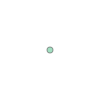

In [8]:
from shapely.geometry import Point  #Define a point

point = Point(-73.97, 40.78)  # longitude/latitute coordinates (-73.97, 40.78) deg.
point

In [11]:
#Collecting metadata for one point
search = client.search(
    collections = [collection],
    intersects = point,
    datetime   = "2021-02/2021-03"
)

In [22]:
search.matched() #how many matches of metadata?

5

In [23]:
items = search.item_collection() #see the metadata items
items

In [24]:
items.save_object("search_NASA_landsat8.json") #save the metadata as a json

In [25]:
assets = items[0].assets  #search through all keys in the dictionary
assets.keys()

dict_keys(['B05', 'B06', 'B01', 'B11', 'B03', 'Fmask', 'B04', 'VAA', 'B09', 'VZA', 'B02', 'SAA', 'SZA', 'B07', 'B10', 'browse', 'metadata'])

In [26]:
assets['browse'].href #Visualize an item’s thumbnail (asset key browse)

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'

In [29]:
assets['SZA'].href #Visualize an item’s thumbnail (asset key browse)

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.SZA.tif'

In [33]:
#Equivalent to restricting stuff to cloud cover less than 15%. NASA doesn't support query.
items_subset = [
    item
    for item in items #list carpentries in python
    if item.properties["eo:cloud_cover"] < 15  #Equivalent to restricting stuff to cloud cover less than 15%. NASA doesn't support query
]

In [34]:
len(items_subset)

2

In [37]:
items_subset[0].properties

{'eo:cloud_cover': 8,
 'datetime': '2021-03-03T15:39:26.373000Z',
 'start_datetime': '2021-03-03T15:39:26.373Z',
 'end_datetime': '2021-03-03T15:39:50.251Z'}

In [39]:
items_subset[0].assets["browse"].href    #first data capture, browse section and finding reference for the image

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'